In [1]:
from sklearn.linear_model import LinearRegression


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score


In [3]:
df = pd.read_csv("StudentsPerformance.csv")
df.head()
df.shape
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [4]:
df.fillna(df.mean(numeric_only=True), inplace=True)


In [5]:
X = df[["reading score"]]   # Independent variable
y = df["math score"]        # Dependent variable


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = LinearRegression()
model.fit(X_train, y_train)

print("Coefficient (Slope):", model.coef_[0])
print("Intercept:", model.intercept_)


Coefficient (Slope): 0.8465291474700295
Intercept: 7.615915147722099


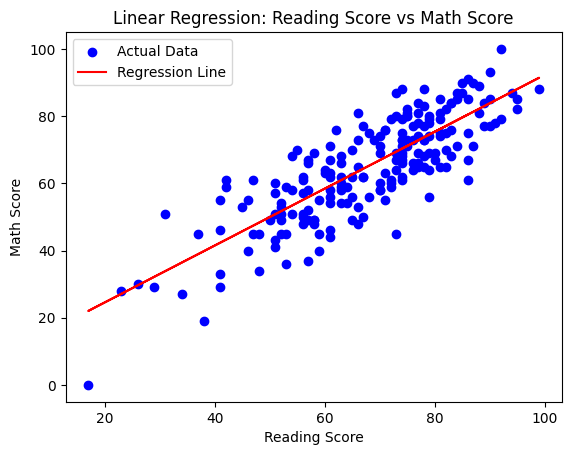

In [8]:
y_pred = model.predict(X_test)

plt.scatter(X_test, y_test, color="blue", label="Actual Data")
plt.plot(X_test, y_pred, color="red", label="Regression Line")

plt.xlabel("Reading Score")
plt.ylabel("Math Score")
plt.title("Linear Regression: Reading Score vs Math Score")
plt.legend()
plt.show()


In [9]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error:", mae)
print("R2 Score:", r2)


Mean Absolute Error: 7.280881770618455
R2 Score: 0.6804469009921283


### Model Interpretation

The coefficient shows how much the math score increases when the reading score
increases by one unit. The intercept represents the expected math score when
the reading score is zero.

### Model Evaluation

The Mean Absolute Error shows the average difference between predicted and
actual math scores. A lower value indicates better performance.

The R2 score indicates how well the model explains the variation in data.
A value closer to 1 means the model performs well.
